# **Project: Remaining Useful Life Prediction using NASA Turbofan simulation data - EDA**

# Task: Exploratory Data Analysis on CMAPSS Dataset FD001
   - Data Inspection & Visualization
   - In-Depth Data Exploration
   - Survival Analysis

### Problem Statement:

This project focuses on predicting the Remaining Useful Life (RUL) of aircraft engines using the NASA C-MAPSS dataset. The dataset contains sensor readings from turbofan engines operating under different conditions, with degradation trends leading to failure.  By analyzing these trends, the goal is to develop insights into engine health and support predictive maintenance strategies.

### CMAPSS dataset

The C-MAPSS dataset is a simulation-based dataset created using NASA's Commercial Modular Aero-Propulsion System Simulation (C-MAPSS) tool. It is not a real-world data, rather a synthetic dataset. It simulates the real-world jet engine degradation by simulating wear and tear over time. it imposes engine degradation process and also adds sensor noises for realistic.

There are four datasets. this project only focuses on the first dataset FD001:

**FD001**: simulates a single fault mode in the High-Pressure Compressor。

It contains:

- Training Set: Each engine is monitored from start until failure. The model learns patterns of degradation to predict failure trends.
- Test Set: Each engine is monitored without failure information. The final recorded state of the engine is used for model evaluation.
- RUL Set: Contains the actual Remaining Useful Life (RUL) for each engine in the test set, serving as the ground truth for performance assessment.


In engine degradation monitoring, different sensors measure different physical properties of the engine. Some properties increase over time as the engine degrades, while others decrease.
   - Some sensor values INCREASE over time (e.g., temperature, vibration).
   - Some sensor values DECREASE over time (e.g., pressure, efficiency)


Dataset can be download from: https://data.nasa.gov/Aerospace/CMAPSS-Jet-Engine-Simulated-Data/ff5v-kuh6/about_data

Reference: 
           
           Saxena, A., Goebel, K., Simon, D., & Eklund, N. (2008, October). Damage propagation modeling for aircraft engine run-to-failure simulation. In 2008 international conference on prognostics and health management (pp. 1-9). IEEE.
           
           Alberto Moccardi, 2024. https://medium.com/@albertomoccardi/deep-learning-strategies-for-predictive-maintenance-9f1f40d8958a

In [ ]:
__author__ = "Bing Huang"
__email__ = "Binghuang1990@gmail.com"

# **0. Load Dependencies**

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter, CoxTimeVaryingFitter


# **1. Load Data & Data Inspection** - (Training dataset)

In [3]:
col_names = ['engine_id', 'time', 'op_setting_1', 'op_setting_2', 'op_setting_3'] + [f'sensor_{s}' for s in range(1, 22)]
df = pd.read_csv("CMAPSSData/train_FD001.txt", header=None, names=col_names, sep='\s+')
df

engine_id  time  op_setting_1  op_setting_2  op_setting_3  sensor_1  \
0              1     1       -0.0007       -0.0004         100.0    518.67   
1              1     2        0.0019       -0.0003         100.0    518.67   
2              1     3       -0.0043        0.0003         100.0    518.67   
3              1     4        0.0007        0.0000         100.0    518.67   
4              1     5       -0.0019       -0.0002         100.0    518.67   
...          ...   ...           ...           ...           ...       ...   
20626        100   196       -0.0004       -0.0003         100.0    518.67   
20627        100   197       -0.0016       -0.0005         100.0    518.67   
20628        100   198        0.0004        0.0000         100.0    518.67   
20629        100   199       -0.0011        0.0003         100.0    518.67   
20630        100   200       -0.0032       -0.0005         100.0    518.67   

       sensor_2  sensor_3  sensor_4  sensor_5  ...  sensor_12  sensor_13  \
0        641.82   1589.70   1400.60     14.62  ...     521.66    2388.02   
1        642.15   1591.82   1403.14     14.62  ...     522.28    2388.07   
2        642.35   1587.99   1404.20     14.62  ...     522.42    2388.03   
3        642.35   1582.79   1401.87     14.62  ...     522.86    2388.08   
4        642.37   1582.85   1406.22     14.62  ...     522.19    2388.04   
...         ...       ...       ...       ...  ...        ...        ...   
20626    643.49   1597.98   1428.63     14.62  ...     519.49    2388.26   
20627    643.54   1604.50   1433.58     14.62  ...     519.68    2388.22   
20628    643.42   1602.46   1428.18     14.62  ...     520.01    2388.24   
20629    643.23   1605.26   1426.53     14.62  ...     519.67    2388.23   
20630    643.85   1600.38   1432.14     14.62  ...     519.30    2388.26   

       sensor_14  sensor_15  sensor_16  sensor_17  sensor_18  sensor_19  \
0        8138.62     8.4195       0.03        392       2388      100.0   
1        8131.49     8.4318       0.03        392       2388      100.0   
2        8133.23     8.4178       0.03        390       2388      100.0   
3        8133.83     8.3682       0.03        392       2388      100.0   
4        8133.80     8.4294       0.03        393       2388      100.0   
...          ...        ...        ...        ...        ...        ...   
20626    8137.60     8.4956       0.03        397       2388      100.0   
20627    8136.50     8.5139       0.03        395       2388      100.0   
20628    8141.05     8.5646       0.03        398       2388      100.0   
20629    8139.29     8.5389       0.03        395       2388      100.0   
20630    8137.33     8.5036       0.03        396       2388      100.0   

       sensor_20  sensor_21  
0          39.06    23.4190  
1          39.00    23.4236  
2          38.95    23.3442  
3          38.88    23.3739  
4          38.90    23.4044  
...          ...        ...  
20626      38.49    22.9735  
20627      38.30    23.1594  
20628      38.44    22.9333  
20629      38.29    23.0640  
20630      38.37    23.0522  

[20631 rows x 26 columns]

In [4]:
df.info()

# no missing values
# data type is correct

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   engine_id     20631 non-null  int64  
 1   time          20631 non-null  int64  
 2   op_setting_1  20631 non-null  float64
 3   op_setting_2  20631 non-null  float64
 4   op_setting_3  20631 non-null  float64
 5   sensor_1      20631 non-null  float64
 6   sensor_2      20631 non-null  float64
 7   sensor_3      20631 non-null  float64
 8   sensor_4      20631 non-null  float64
 9   sensor_5      20631 non-null  float64
 10  sensor_6      20631 non-null  float64
 11  sensor_7      20631 non-null  float64
 12  sensor_8      20631 non-null  float64
 13  sensor_9      20631 non-null  float64
 14  sensor_10     20631 non-null  float64
 15  sensor_11     20631 non-null  float64
 16  sensor_12     20631 non-null  float64
 17  sensor_13     20631 non-null  float64
 18  sensor_14     20631 non-nu

In [5]:
df.describe()

# constant values are found in op_setting_3, sensor_1, sensor_5, sensor_6, sensor_10, sensor_16, sensor_18, sensor_19

engine_id          time  op_setting_1  op_setting_2  op_setting_3  \
count  20631.000000  20631.000000  20631.000000  20631.000000       20631.0   
mean      51.506568    108.807862     -0.000009      0.000002         100.0   
std       29.227633     68.880990      0.002187      0.000293           0.0   
min        1.000000      1.000000     -0.008700     -0.000600         100.0   
25%       26.000000     52.000000     -0.001500     -0.000200         100.0   
50%       52.000000    104.000000      0.000000      0.000000         100.0   
75%       77.000000    156.000000      0.001500      0.000300         100.0   
max      100.000000    362.000000      0.008700      0.000600         100.0   

       sensor_1      sensor_2      sensor_3      sensor_4      sensor_5  ...  \
count  20631.00  20631.000000  20631.000000  20631.000000  2.063100e+04  ...   
mean     518.67    642.680934   1590.523119   1408.933782  1.462000e+01  ...   
std        0.00      0.500053      6.131150      9.000605  1.776400e-15  ...   
min      518.67    641.210000   1571.040000   1382.250000  1.462000e+01  ...   
25%      518.67    642.325000   1586.260000   1402.360000  1.462000e+01  ...   
50%      518.67    642.640000   1590.100000   1408.040000  1.462000e+01  ...   
75%      518.67    643.000000   1594.380000   1414.555000  1.462000e+01  ...   
max      518.67    644.530000   1616.910000   1441.490000  1.462000e+01  ...   

          sensor_12     sensor_13     sensor_14     sensor_15     sensor_16  \
count  20631.000000  20631.000000  20631.000000  20631.000000  2.063100e+04   
mean     521.413470   2388.096152   8143.752722      8.442146  3.000000e-02   
std        0.737553      0.071919     19.076176      0.037505  1.387812e-17   
min      518.690000   2387.880000   8099.940000      8.324900  3.000000e-02   
25%      520.960000   2388.040000   8133.245000      8.414900  3.000000e-02   
50%      521.480000   2388.090000   8140.540000      8.438900  3.000000e-02   
75%      521.950000   2388.140000   8148.310000      8.465600  3.000000e-02   
max      523.380000   2388.560000   8293.720000      8.584800  3.000000e-02   

          sensor_17  sensor_18  sensor_19     sensor_20     sensor_21  
count  20631.000000    20631.0    20631.0  20631.000000  20631.000000  
mean     393.210654     2388.0      100.0     38.816271     23.289705  
std        1.548763        0.0        0.0      0.180746      0.108251  
min      388.000000     2388.0      100.0     38.140000     22.894200  
25%      392.000000     2388.0      100.0     38.700000     23.221800  
50%      393.000000     2388.0      100.0     38.830000     23.297900  
75%      394.000000     2388.0      100.0     38.950000     23.366800  
max      400.000000     2388.0      100.0     39.430000     23.618400  

[8 rows x 26 columns]

In [6]:
# remove columns with constant values
df = df .drop(columns=['op_setting_3'] + [f'sensor_{s}' for s in [1, 5, 6, 10, 16, 18, 19]])
df

engine_id  time  op_setting_1  op_setting_2  sensor_2  sensor_3  \
0              1     1       -0.0007       -0.0004    641.82   1589.70   
1              1     2        0.0019       -0.0003    642.15   1591.82   
2              1     3       -0.0043        0.0003    642.35   1587.99   
3              1     4        0.0007        0.0000    642.35   1582.79   
4              1     5       -0.0019       -0.0002    642.37   1582.85   
...          ...   ...           ...           ...       ...       ...   
20626        100   196       -0.0004       -0.0003    643.49   1597.98   
20627        100   197       -0.0016       -0.0005    643.54   1604.50   
20628        100   198        0.0004        0.0000    643.42   1602.46   
20629        100   199       -0.0011        0.0003    643.23   1605.26   
20630        100   200       -0.0032       -0.0005    643.85   1600.38   

       sensor_4  sensor_7  sensor_8  sensor_9  sensor_11  sensor_12  \
0       1400.60    554.36   2388.06   9046.19      47.47     521.66   
1       1403.14    553.75   2388.04   9044.07      47.49     522.28   
2       1404.20    554.26   2388.08   9052.94      47.27     522.42   
3       1401.87    554.45   2388.11   9049.48      47.13     522.86   
4       1406.22    554.00   2388.06   9055.15      47.28     522.19   
...         ...       ...       ...       ...        ...        ...   
20626   1428.63    551.43   2388.19   9065.52      48.07     519.49   
20627   1433.58    550.86   2388.23   9065.11      48.04     519.68   
20628   1428.18    550.94   2388.24   9065.90      48.09     520.01   
20629   1426.53    550.68   2388.25   9073.72      48.39     519.67   
20630   1432.14    550.79   2388.26   9061.48      48.20     519.30   

       sensor_13  sensor_14  sensor_15  sensor_17  sensor_20  sensor_21  
0        2388.02    8138.62     8.4195        392      39.06    23.4190  
1        2388.07    8131.49     8.4318        392      39.00    23.4236  
2        2388.03    8133.23     8.4178        390      38.95    23.3442  
3        2388.08    8133.83     8.3682        392      38.88    23.3739  
4        2388.04    8133.80     8.4294        393      38.90    23.4044  
...          ...        ...        ...        ...        ...        ...  
20626    2388.26    8137.60     8.4956        397      38.49    22.9735  
20627    2388.22    8136.50     8.5139        395      38.30    23.1594  
20628    2388.24    8141.05     8.5646        398      38.44    22.9333  
20629    2388.23    8139.29     8.5389        395      38.29    23.0640  
20630    2388.26    8137.33     8.5036        396      38.37    23.0522  

[20631 rows x 18 columns]

## 1.1 Plot sensor readings

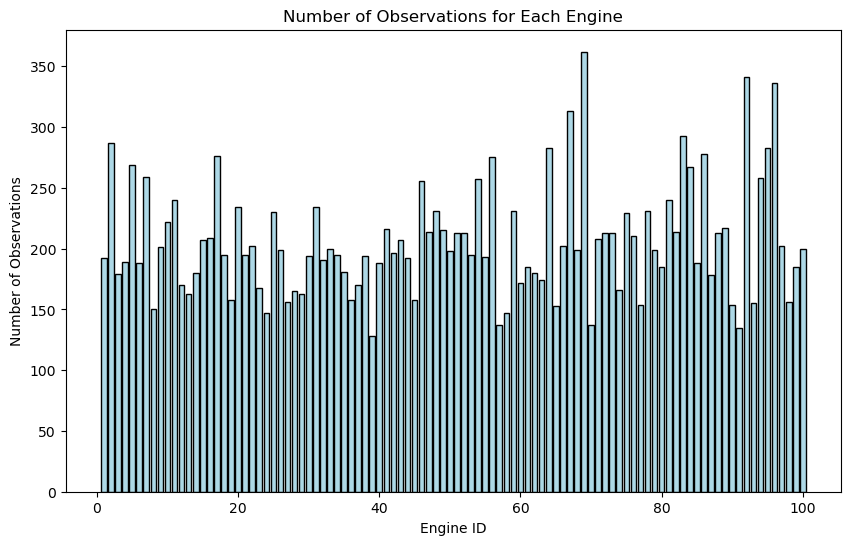

In [7]:
# How many sensor reading observations for each engine?

df_engines_count = df.groupby('engine_id')['time'].count()

plt.figure(figsize=(10, 6))
plt.bar(df_engines_count.index, df_engines_count.values, color='lightblue', edgecolor='black')
plt.xlabel('Engine ID')
plt.ylabel('Number of Observations')
plt.title('Number of Observations for Each Engine')
plt.show()

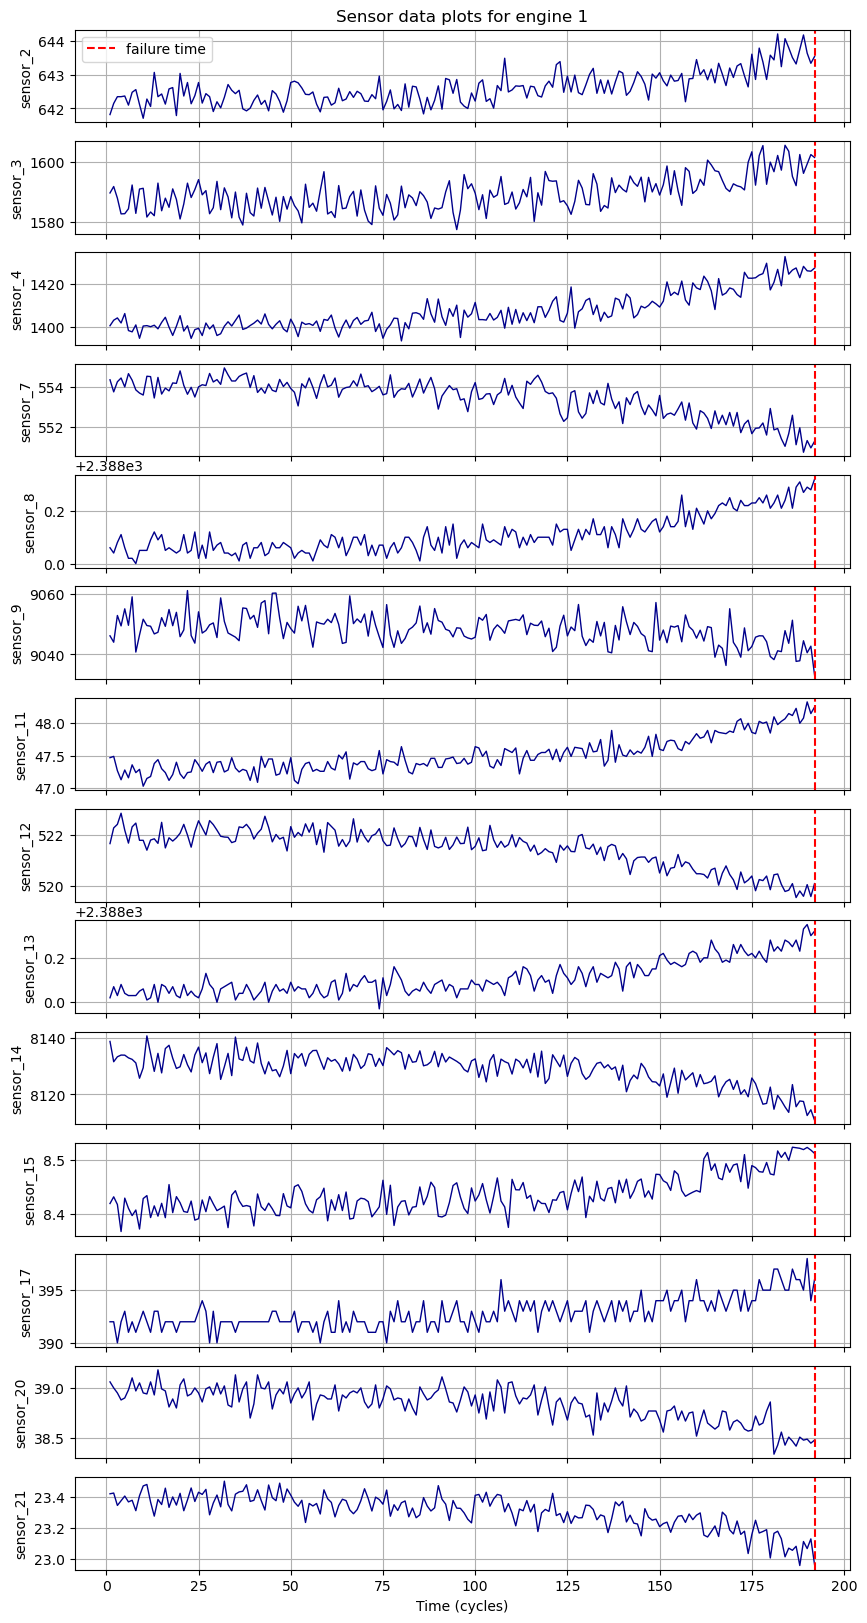

In [8]:
# plot sensor reading data for engine 1

df_engine_1 = df[df['engine_id'] == 1]
sensor_col = [col for col in df_engine_1.columns if 'sensor_' in col]

# failure cycle for engine 1
failure_cycle = df_engine_1['time'].max()

# create subplots
fig, axes = plt.subplots(len(sensor_col), 1, figsize = (10, 20), sharex = True)
for i, sensor in enumerate(sensor_col):
    axes[i].plot(df_engine_1['time'], df_engine_1[sensor], color = 'darkblue', linewidth=1)
    axes[i].axvline(x=failure_cycle, color = 'red', linestyle = '--', label ="failure time")
    axes[i].set_ylabel(sensor)
    axes[i].grid(True)

axes[0].set_title('Sensor data plots for engine 1')
axes[0].legend()

plt.xlabel("Time (cycles)")
plt.show()

# sensor 8 and sensor 13 values are large, around 2000+ cycles, so matplotlib uses a large scale to plot the data

**Observation 1:**
These sensor data are in different scale, so data scaling is needed.

Different sensors measure different physical properties of the engine. 
- Some properties increase over time as the engine degrades, e.g., temperature, vibration
- while others decrease, e.g., pressure, efficiency

## 1.2 Add "RUL" column

The data is "run-to-failure" time series data, so RUL = max(time) - current(Time)

In [9]:
df['RUL'] = df.groupby('engine_id')['time'].transform('max') - df['time'] # transform('max'): broadcast the max value within each group
df.head()


engine_id  time  op_setting_1  op_setting_2  sensor_2  sensor_3  sensor_4  \
0          1     1       -0.0007       -0.0004    641.82   1589.70   1400.60   
1          1     2        0.0019       -0.0003    642.15   1591.82   1403.14   
2          1     3       -0.0043        0.0003    642.35   1587.99   1404.20   
3          1     4        0.0007        0.0000    642.35   1582.79   1401.87   
4          1     5       -0.0019       -0.0002    642.37   1582.85   1406.22   

   sensor_7  sensor_8  sensor_9  sensor_11  sensor_12  sensor_13  sensor_14  \
0    554.36   2388.06   9046.19      47.47     521.66    2388.02    8138.62   
1    553.75   2388.04   9044.07      47.49     522.28    2388.07    8131.49   
2    554.26   2388.08   9052.94      47.27     522.42    2388.03    8133.23   
3    554.45   2388.11   9049.48      47.13     522.86    2388.08    8133.83   
4    554.00   2388.06   9055.15      47.28     522.19    2388.04    8133.80   

   sensor_15  sensor_17  sensor_20  sensor_21  RUL  
0     8.4195        392      39.06    23.4190  191  
1     8.4318        392      39.00    23.4236  190  
2     8.4178        390      38.95    23.3442  189  
3     8.3682        392      38.88    23.3739  188  
4     8.4294        393      38.90    23.4044  187

# **2. In-Depth Data Exploration**

## 2.1 Heatmap: Correlation between features
A correlation heatmap helps identify how strongly each feature (operation settings and sensor reading) is related to the Remaining Useful Life (RUL). This is useful for feature selection in predictive maintenance.

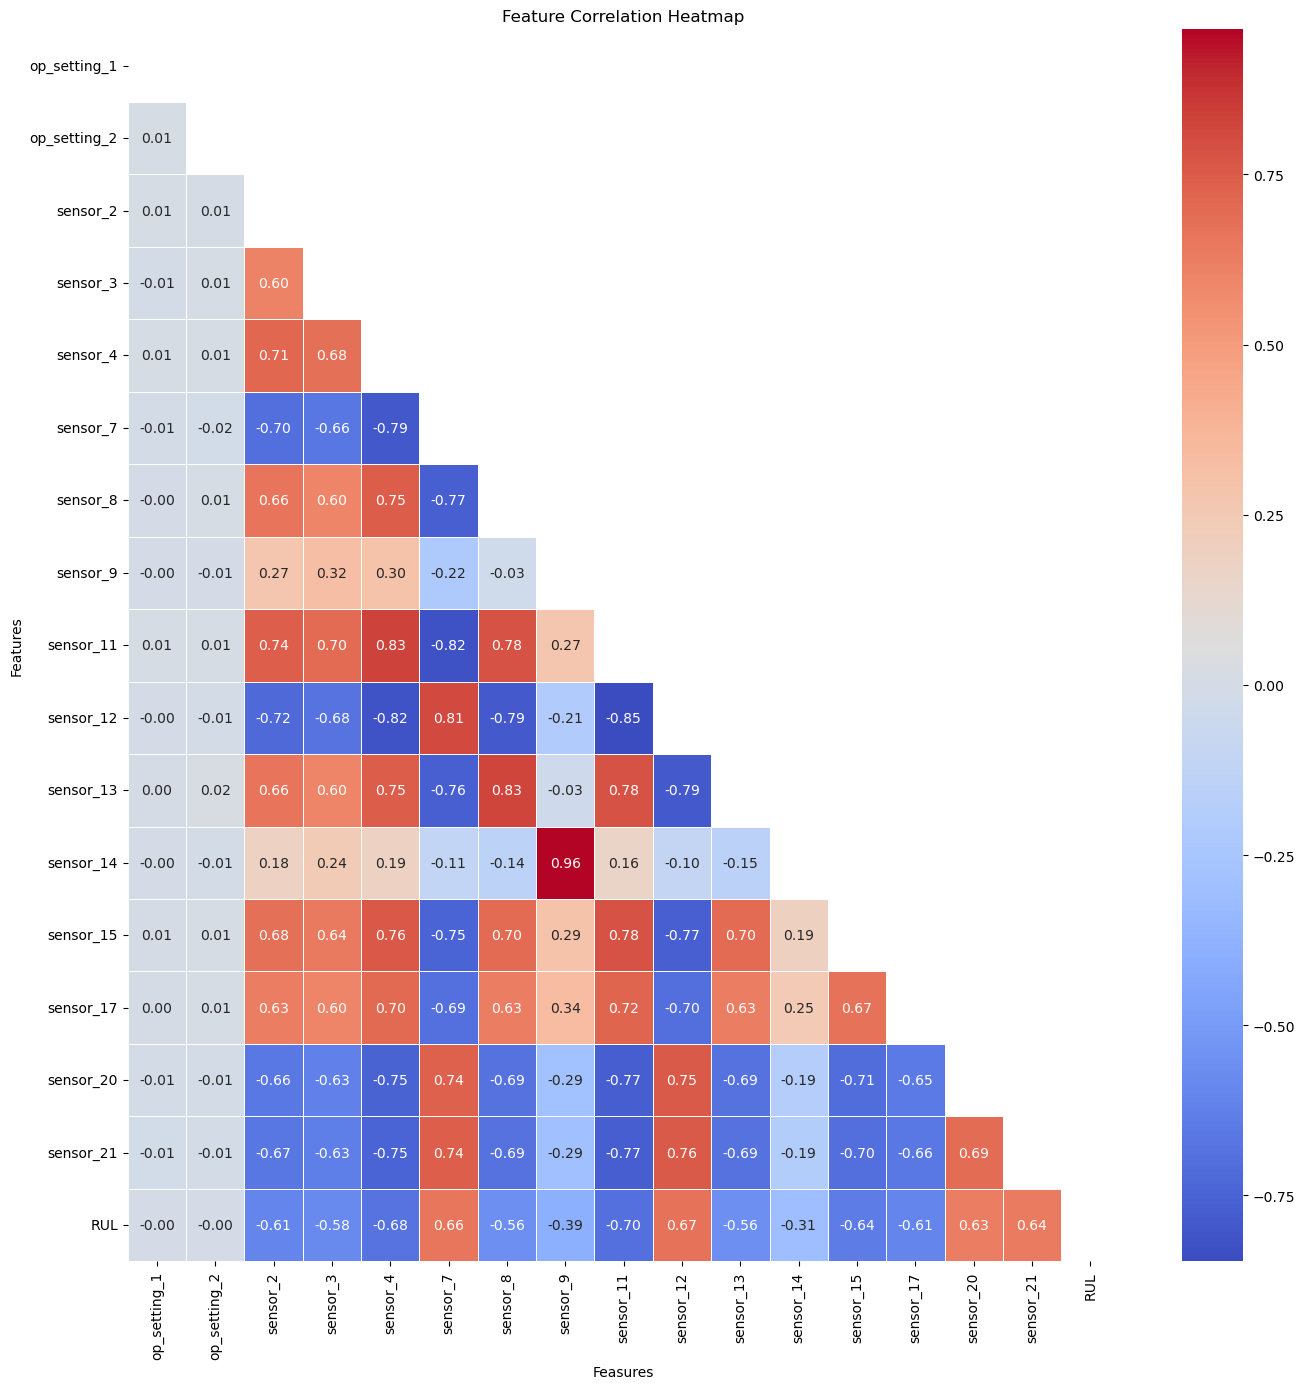

In [10]:
df_1 = df.drop(columns=['engine_id', 'time'])
corr_matrix = df_1.corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Mask upper triangle

plt.figure(figsize=(16, 16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, mask = mask)
plt.title("Feature Correlation Heatmap")
plt.ylabel("Features")
plt.xlabel("Feasures")
plt.show()

In [11]:
threshold = 0.8

print("Strong Correlations (>|0.8| or <|-0.8|):")
for i in range(len(corr_matrix.columns)):  
    for j in range(i):       # only check j < i
        corr_value = corr_matrix.iloc[i, j] # retrieves the value at row i, column j of the matrix
        if abs(corr_value) > threshold:  
            feature_1 = corr_matrix.columns[i]
            feature_2 = corr_matrix.columns[j]
            print(f"{feature_1} * {feature_2} = {corr_value:.2f}")

Strong Correlations (>|0.8| or <|-0.8|):
sensor_11 * sensor_4 = 0.83
sensor_11 * sensor_7 = -0.82
sensor_12 * sensor_4 = -0.82
sensor_12 * sensor_7 = 0.81
sensor_12 * sensor_11 = -0.85
sensor_13 * sensor_8 = 0.83
sensor_14 * sensor_9 = 0.96


**Oberservations:**

- sensor 9 and 14 are highly correlated, models (like LR, SVM) are affected by Multicollinearity; DL model will not be directly influenced, but multicollinearity can still impact training efficiency, overfitting, ect.
- Tree-based models will not be affected, Random Forest model can be used for feature importance.

## 2.2 Box Plot on Sensor Readings

**Observations：**

The Box Plot shows that sensor readings have very different scales, which could impact model performance if they are not normalized.

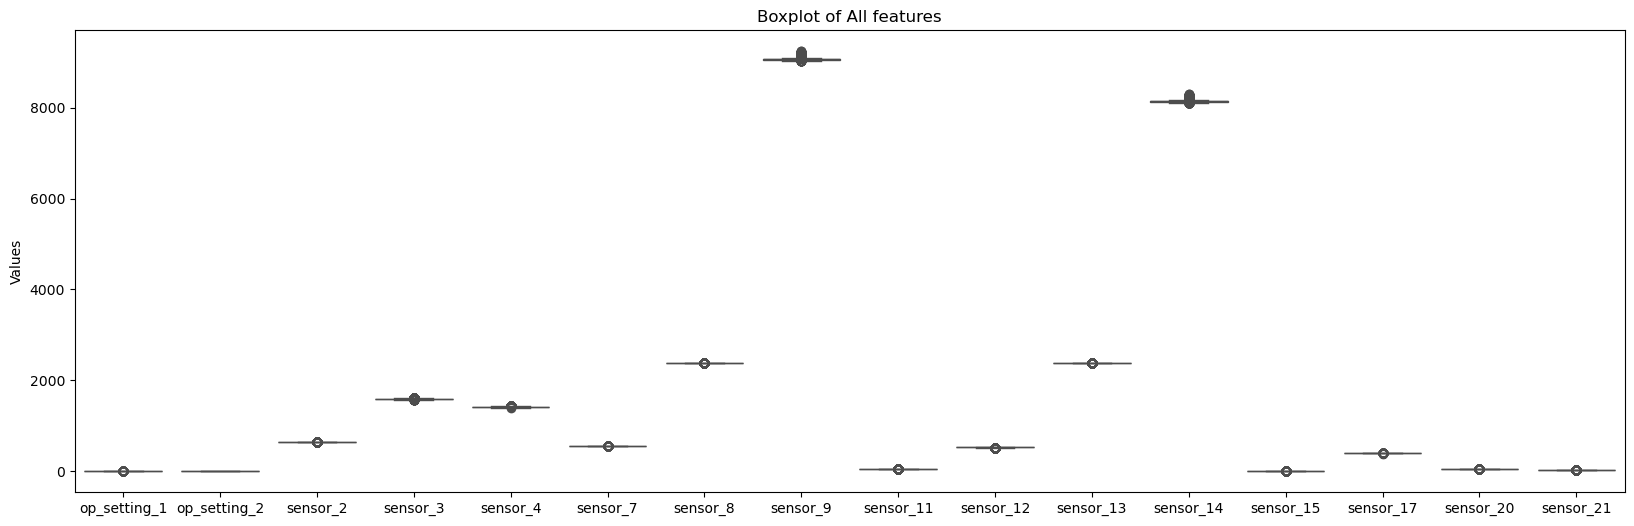

In [12]:
df_features = df.drop(columns=['engine_id', 'time', 'RUL'])

plt.figure(figsize=(20, 6))
sns.boxplot(data=df_features, palette='coolwarm')
plt.title("Boxplot of All features")
plt.ylabel("Values")
plt.show()

## 2.3 The Relationship between Sensor Readings vs. RUL

- First, use the scatter plots to visualize the relationship between each sensor reading and the RUL for different engines.

    It illustrate how each sensor reading change as an engine moves close to failure (RUL = 0)

- Second, use line plots to visualize the averag sensor reading as a function of RUL to reveal degradation trends

### 2.3.1 Scatter Plot: Sensor Readings vs. RUL for Individual Engines

**Observations:**
-  Sensors 2, 3, 4, 8, 11, 13, 15 show an increasing trend as RUL decreases ---> positive correlation between sensors and engine degradation
   
   Sensors 7, 12, 20, 21 show a decreasing trend as RUL decreases ---> negative correlation between sensore and engine degradation
                
-  Sensors 9 and 14:  
    For higher RUL values (left side), sensor readings are relative stable with minor fluctuations
    For lower RUL values (Right side), sensor readings diverge significantly, showing different degradation behaviour across engines
    the scatter plots strongly suggest the non-linear degradation patterns, with significant changes occuring only near the failure.

-  Sensor 17 has discrete values, the trend suggests a linear or piecewise-linear relationship between sensor 17 and RUL.

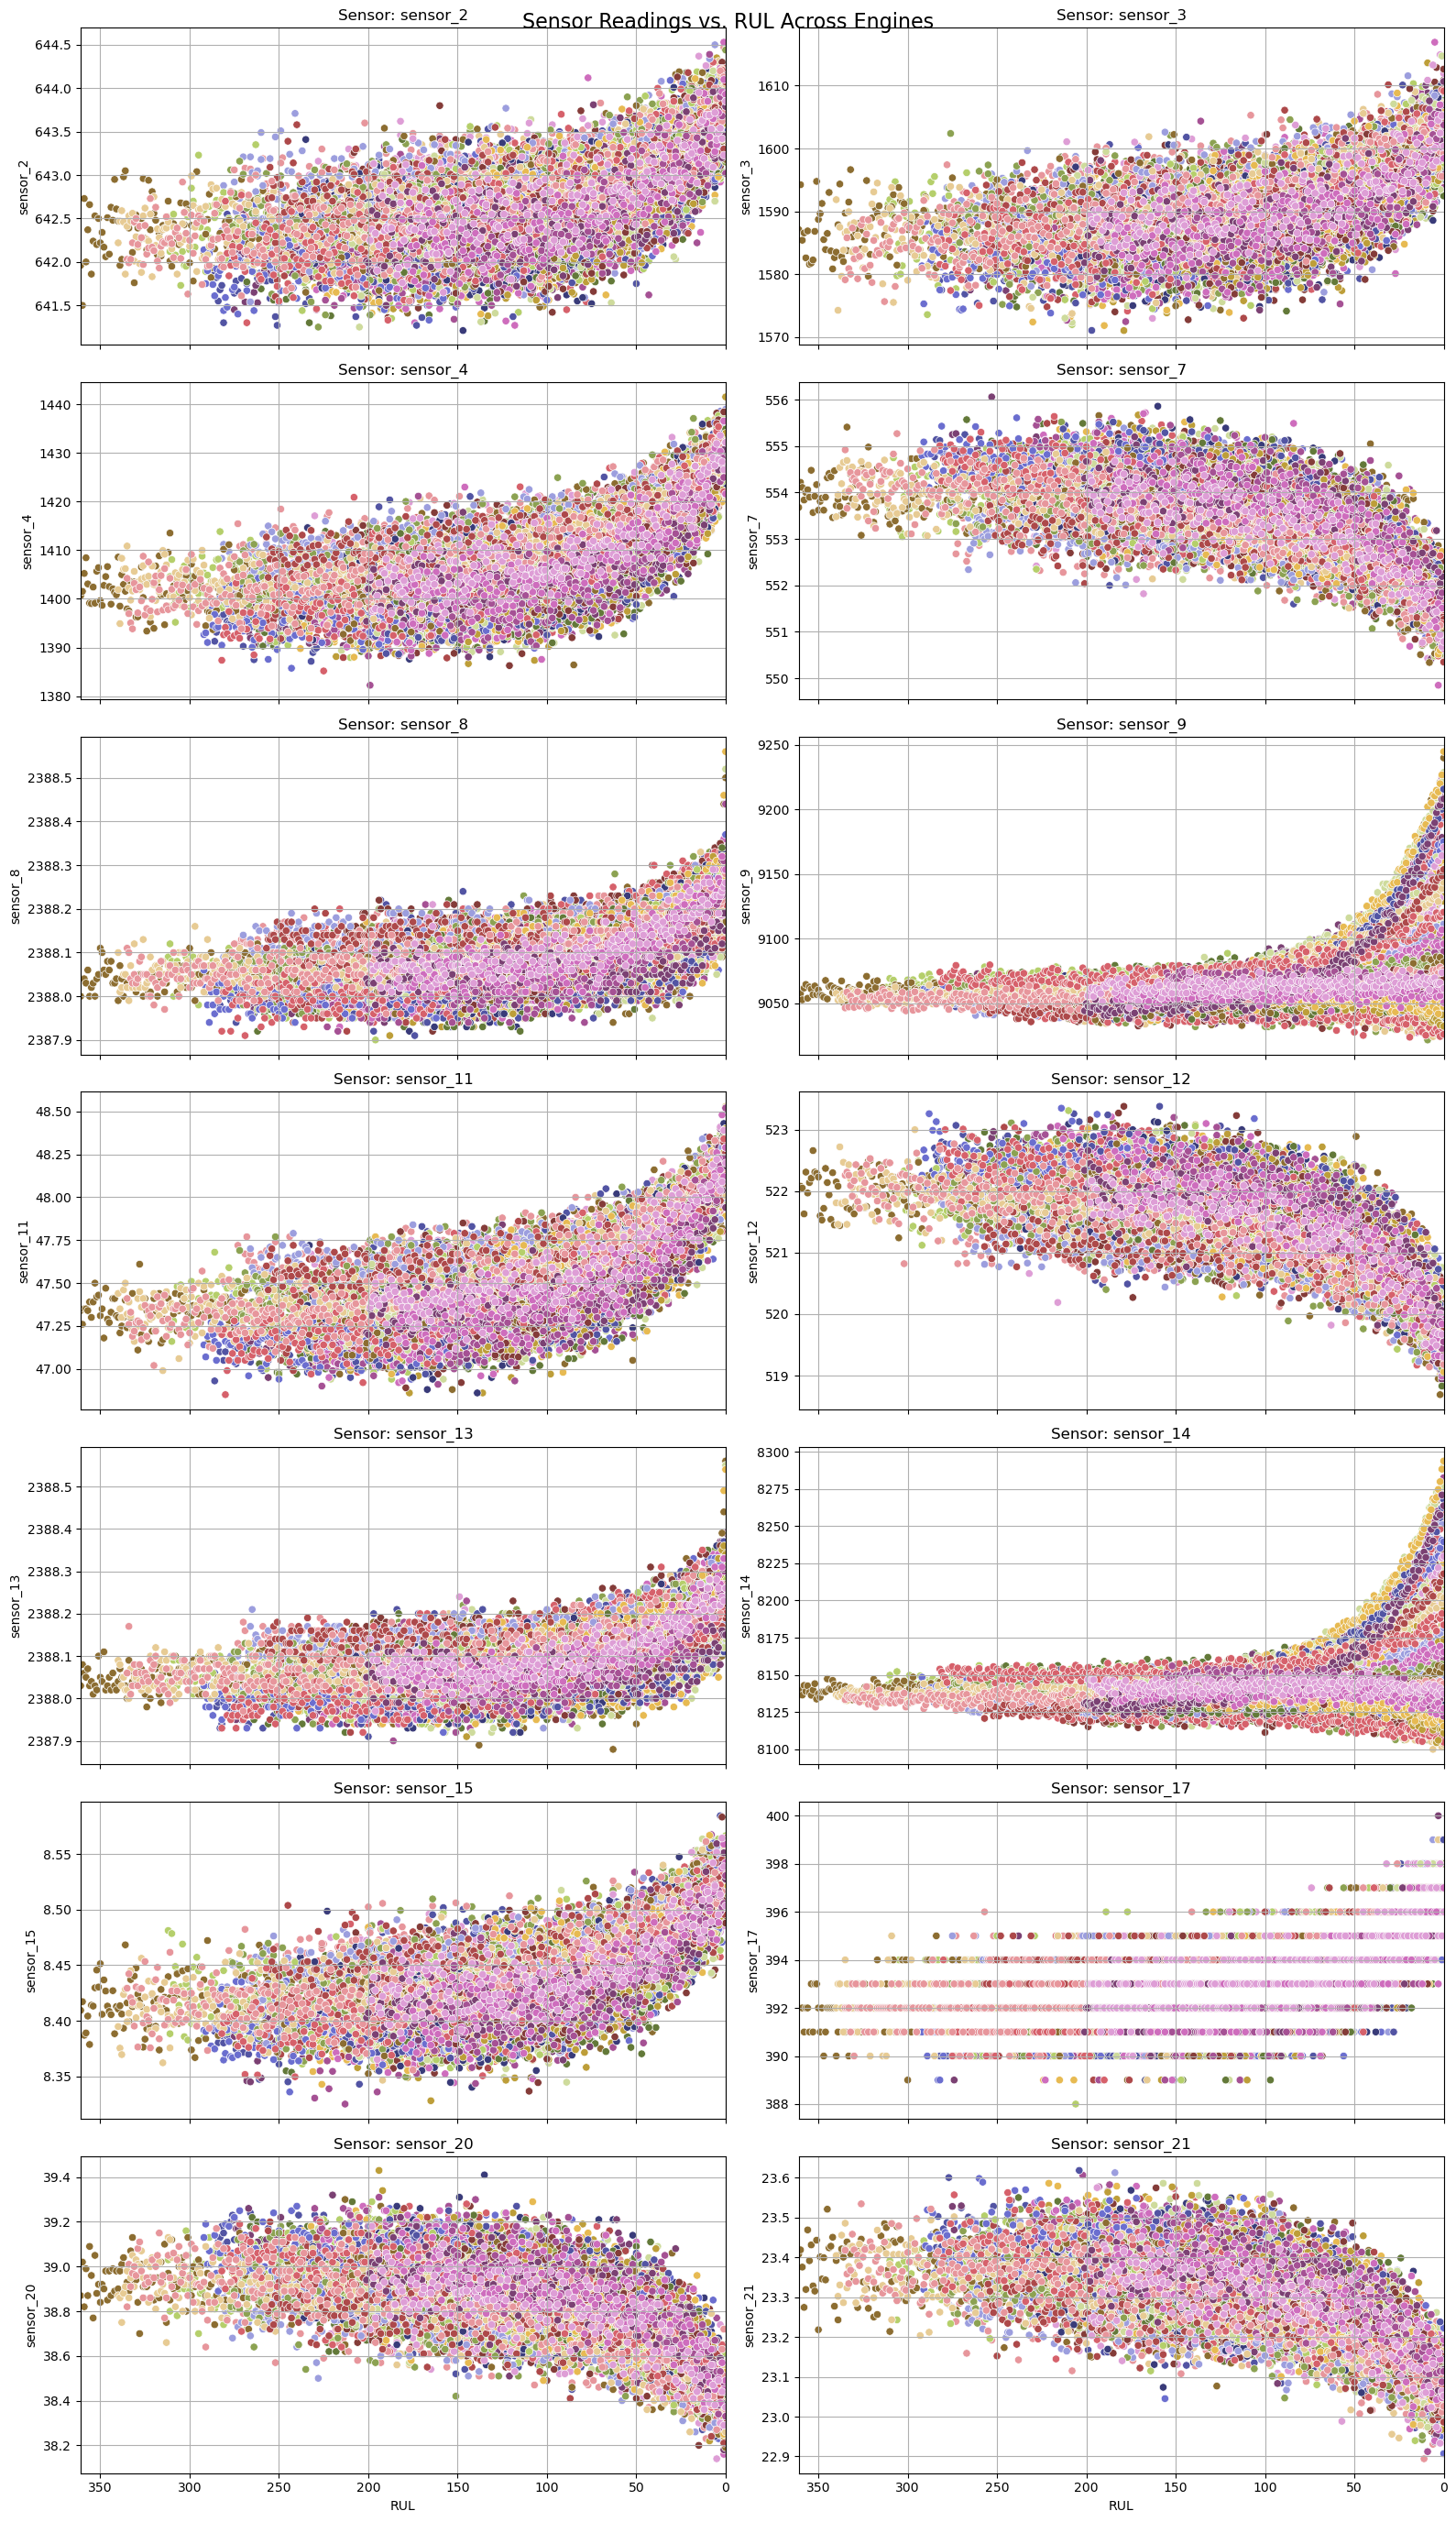

In [13]:
#sensor_col = [col for col in df_engine_1.columns if 'sensor_' in col]

fig, ax = plt.subplots(7, 2, figsize=(16, 28), sharex=True)
ax = ax.flatten()  # Convert to a 1D list for multiple columns of subplots

# Create a color palette for 100 engines
palette = sns.color_palette("tab20b", 100)

# scatter plots for each sensor vs. RUL
for i, sensor in enumerate(sensor_col): 
    sns.scatterplot(data=df, ax=ax[i], x='RUL', y=sensor, hue='engine_id', palette=palette, legend=False)
    ax[i].set_title(f"Sensor: {sensor}", fontsize=12)
    ax[i].invert_xaxis()               # Invert x-axis so RUL decreases from left to right
    ax[i].set_xlim(df["RUL"].max(), df["RUL"].min())
    ax[i].set_ylabel(sensor)
    ax[i].grid(True)

fig.suptitle("Sensor Readings vs. RUL Across Engines", fontsize=16)
plt.xlabel("RUL")
plt.tight_layout()
plt.show()

### 2.3.2 Line Plot: Average Sensor Trends vs. RUL

Instead of looking at individual engines, I aggregate sensor readings across all engines (as these engines are of one type) by averaging them at each Remaining Useful Life (RUL) value. This helps to identify general trends in sensor behavior as engines approach failure.

**Observations**

- We can see the average trend of sensor readings vs. RUL for each sensor. 

- However, at the early stage (left side), there is a strong fluctuation (high variability) for each sensor. when near the failure, the trends are more stables, suggesting at this phase, the degradation process becomes more predictable.

- This suggests that using the late-stage (failure phase) in the prediction model is more reliable. so many predictive maintenance studies suggest capping the RUL values at a certain thredhold, such as 150 time cycles, to improve model preformance.




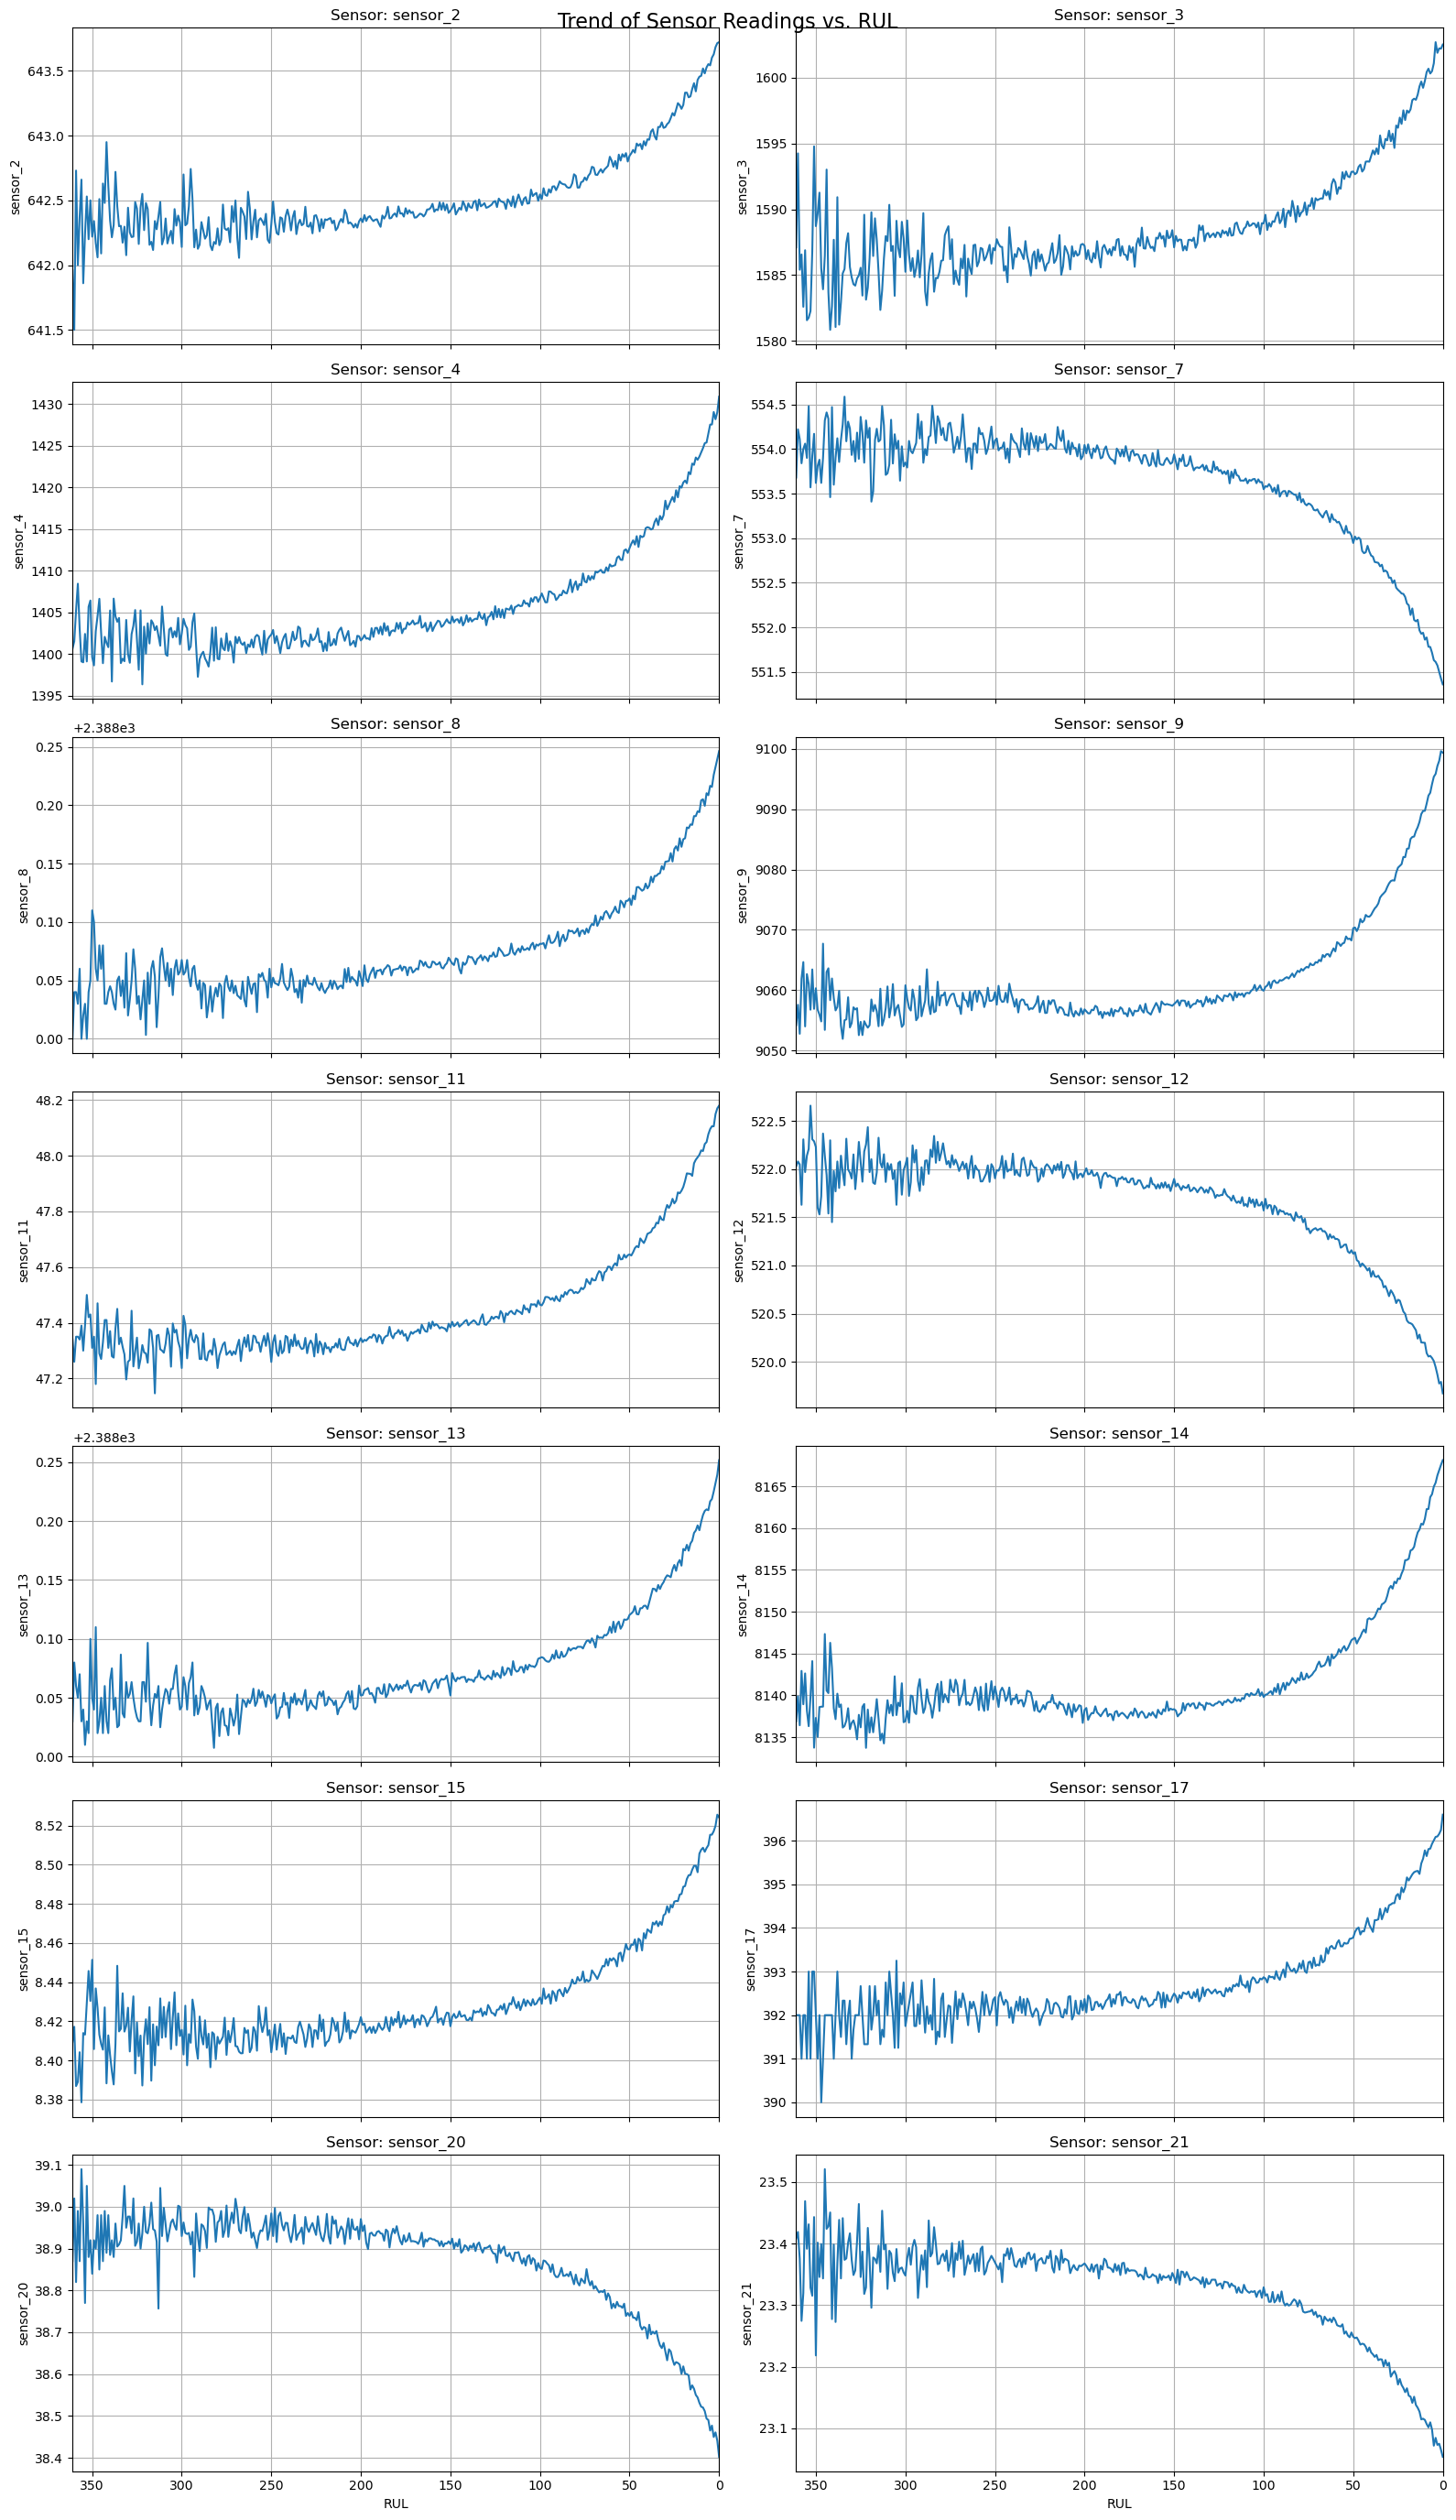

In [14]:
# sensor_col = [col for col in df_engine_1.columns if 'sensor_' in col]

fig, ax = plt.subplots(7, 2, figsize=(16, 28), sharex=True)
ax = ax.flatten() 

# Group data by RUL and compute mean for each sensor
df_grouped = df.groupby('RUL')[sensor_col].mean()

# Line plots for each sensor vs. RUL
for i, sensor in enumerate(sensor_col): 
    sns.lineplot(data=df_grouped, ax=ax[i], x=df_grouped.index, y=sensor)
    ax[i].set_title(f"Sensor: {sensor}", fontsize=12)
    ax[i].invert_xaxis()
    ax[i].set_xlim(df["RUL"].max(), df["RUL"].min())
    ax[i].set_ylabel(sensor)
    ax[i].grid(True)

fig.suptitle("Trend of Sensor Readings vs. RUL", fontsize=16)
plt.xlabel("RUL")
plt.tight_layout()
plt.show()

# **3. Survival Analysis**

Survival analysis is a statistical method used to estimate time-to-failure probability. In this case, it can help model the probability of an engine surviving beyond a certain RUL and determine critical degradation points.

Survival analysis often involves both Kaplan-Meier (KM) curves and the Cox Proportional Hazards (Cox PH) model:

- The Kaplan-Meier curve is a non-parametric estimator used to estimate the survival probability over time. It is commonly used in survival analysis to measure the time until an event occurs, such as engine failure in predictive maintenance, patient survival in medical studies, or customer churn in business analytics.

This study uses KM curve to show the average survival probability (over all 100 engines) over time cycles.

- Cox PH model is a semi-parametric regression model to identify risk factors. It quantifies the effect of covariates on failure probability.

   There are multiple variations of Cox models, depending on whether covariates are fixed or time-varying, 

     - Standard Cox Proportional Hazards Model (Cox PH):  When covariates (features) do not change over time (static predictors).
     - Cox Time-Varying Model (Cox Time-Dependent) : When covariates change over time (e.g., sensor readings at different cycles).


**Dataset Preparation:**

The data shoud be prepared properly for Kaplan-Meier analysis and Cox Proportional Hazard modeling.

- Add a 'event' column: Indicates whether an engine has failed (1) or is still running (0).
- Create start and stop time columns: Needed for Cox Proportional Hazards (Time-Varying) models.
- Introduce right censoring at 200 time cycles: Simulates real-world maintenance, where engines may be replaced before total failure. 


## 3.1 Kaplan Meier Curve

In [ ]:
df_sa = df.copy()

df_sa['event'] = 0

# engines fail when at the last cycle
df_sa.loc[df['RUL'] == 0, 'event'] = 1

# introduce Right censoring (200)
right_censor = 200
df_censored = df_sa[df_sa['time'] <= right_censor].copy()

# Prepare Data for Kaplan-Meier Analysis
df_km = df_censored.groupby('engine_id').last()[['time', 'event']]

df_km

time  event
engine_id             
1           192      1
2           200      0
3           179      1
4           189      1
5           200      0
...         ...    ...
96          200      0
97          200      0
98          156      1
99          185      1
100         200      1

[100 rows x 2 columns]

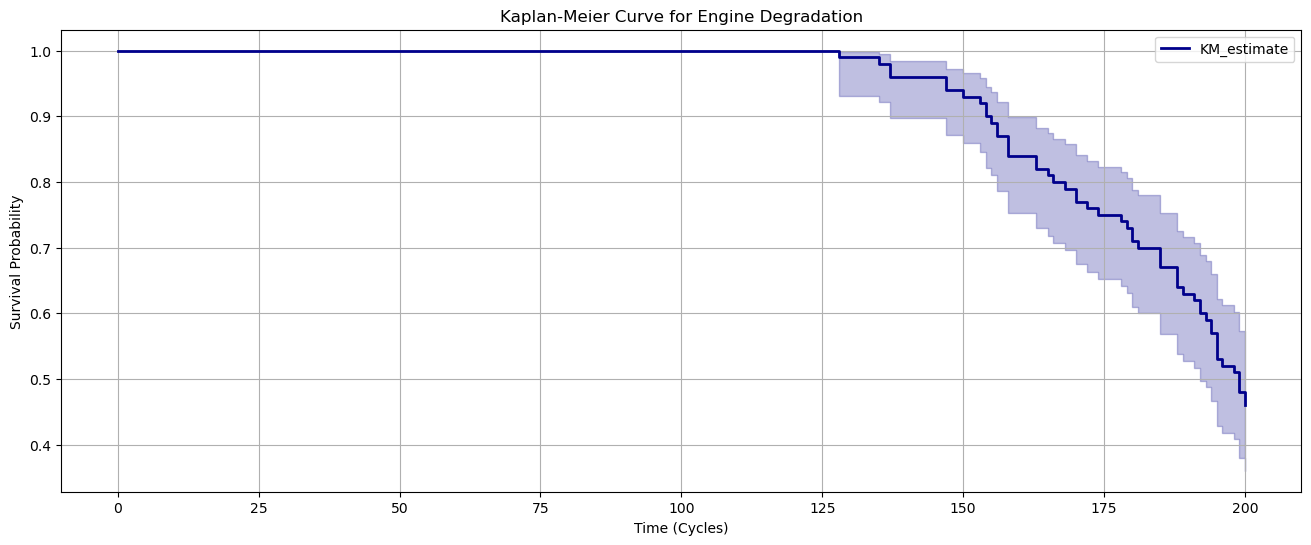

In [16]:
# survival analysis

kmf = KaplanMeierFitter()

kmf.fit(durations=df_km['time'], event_observed=df_km['event'])

# plot 
plt.figure(figsize = (16, 6))
kmf.plot(color='darkblue', linewidth=2)
plt.title("Kaplan-Meier Curve for Engine Degradation")
plt.xlabel("Time (Cycles)")
plt.ylabel("Survival Probability")
plt.grid(True)
plt.show()

## 3.2 Cox Proportional Hazard Model

In [22]:
df_cox = df_sa.copy()

df_cox['start'] = df_cox['time'] - 1  # Previous cycle
df_cox['stop'] = df_cox['time'] 

# Select relevant features (time-varying covariates)
features = sensor_col 
df_cox = df_cox[['engine_id', 'start', 'stop', 'event'] + features]

ctv = CoxTimeVaryingFitter()
ctv.fit(df_cox, id_col='engine_id', event_col='event', start_col='start', stop_col='stop', show_progress=True)
ctv.print_summary()

Iteration 1: norm_delta = 1.00e+00, step_size = 0.9500, log_lik = -363.73938, newton_decrement = 1.69e+02, seconds_since_start = 0.0
Iteration 2: norm_delta = 1.23e+00, step_size = 0.9500, log_lik = -196.95744, newton_decrement = 6.53e+01, seconds_since_start = 0.0
Iteration 3: norm_delta = 7.49e-01, step_size = 0.9500, log_lik = -141.32406, newton_decrement = 2.53e+01, seconds_since_start = 0.0
Iteration 4: norm_delta = 7.27e-01, step_size = 0.9310, log_lik = -129.43964, newton_decrement = 1.68e+01, seconds_since_start = 0.1
Iteration 5: norm_delta = 2.30e-01, step_size = 1.0000, log_lik = -115.92018, newton_decrement = 1.13e+00, seconds_since_start = 0.1
Iteration 6: norm_delta = 4.04e-02, step_size = 1.0000, log_lik = -114.78357, newton_decrement = 1.24e-02, seconds_since_start = 0.1
Iteration 7: norm_delta = 5.62e-04, step_size = 1.0000, log_lik = -114.77107, newton_decrement = 2.21e-06, seconds_since_start = 0.1
Iteration 8: norm_delta = 1.18e-07, step_size = 1.0000, log_lik = -11

<lifelines.CoxTimeVaryingFitter: fitted with 20631 periods, 100 subjects, 100 events>
         event col = 'event'
number of subjects = 100
 number of periods = 20631
  number of events = 100
partial log-likelihood = -114.77
  time fit was run = 2025-02-25 11:40:39 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
sensor_2   1.42      4.15      0.50            0.45            2.40                1.57               11.00
sensor_3   0.02      1.02      0.03           -0.04            0.08                0.96                1.09
sensor_4   0.15      1.16      0.03            0.08            0.21                1.08                1.24
sensor_7  -0.90      0.41      0.35           -1.59           -0.21                0.20                0.81
sensor_8  -1.70      0.18      3.72           -9.00            5.60                0.00              270.38
sensor_9  -0.01      0.99      0.03           -0.06            0.04                0.94                1.04
sensor_11  4.50     89.76      1.20            2.15            6.84                8.61              935.87
sensor_12 -1.65      0.19      0.41           -2.46           -0.83                0.09                0.43
sensor_13  6.20    493.34      3.82           -1.29           13.69                0.27            8.85e+05
sensor_14  0.03      1.03      0.03           -0.03            0.08                0.97                1.09
sensor_15  3.39     29.78      7.01          -10.34           17.12                0.00            2.74e+07
sensor_17  0.24      1.28      0.15           -0.05            0.54                0.95                1.71
sensor_20 -4.87      0.01      1.46           -7.73           -2.02                0.00                0.13
sensor_21 -3.72      0.02      2.15           -7.94            0.50                0.00                1.65

           cmp to     z      p  -log2(p)
covariate                               
sensor_2     0.00  2.87 <0.005      7.91
sensor_3     0.00  0.65   0.52      0.96
sensor_4     0.00  4.23 <0.005     15.37
sensor_7     0.00 -2.55   0.01      6.52
sensor_8     0.00 -0.46   0.65      0.63
sensor_9     0.00 -0.37   0.71      0.49
sensor_11    0.00  3.76 <0.005     12.52
sensor_12    0.00 -3.97 <0.005     13.78
sensor_13    0.00  1.62   0.10      3.25
sensor_14    0.00  0.89   0.37      1.42
sensor_15    0.00  0.48   0.63      0.67
sensor_17    0.00  1.64   0.10      3.32
sensor_20    0.00 -3.34 <0.005     10.23
sensor_21    0.00 -1.73   0.08      3.57
---
Partial AIC = 257.54
log-likelihood ratio test = 497.94 on 14 df
-log2(p) of ll-ratio test = 320.88

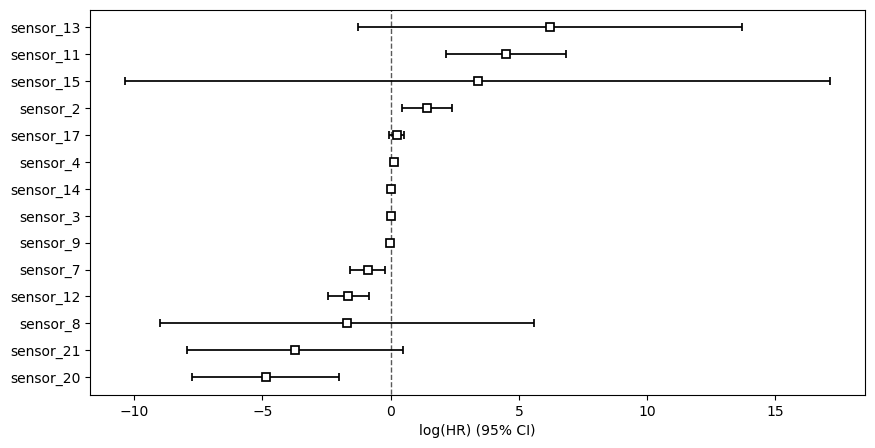

In [23]:
plt.figure(figsize=(10,5))
ctv.plot()
plt.show()
plt.close()

The plot shows the log of hazard ratios with 95% confidence intervals for sensore readings

 - Log(HR) values > 0: Higher sensor values increase failure risk
 - Log(HR) values = 0: no effect
 - Log(HR) values < 0: Higher sensor values decrease failure risk

 - sensor 2, 11 --> High hazard ratios, narrow CIs; larger values significant increase the failure risk;
 - sensor 12, 20 --> larger values Reduce failure risk.
 - Sensor 13, 15, 8, 21, have a wide CI, suggesting High uncertainty, variability.
 - sensor 4, 7, 14, 3, 9, 17 have no strong effect.